数据预处理

数据为什么需要预处理
在现实生活问题中，我们得到的原好数据往往非常混乱、不全面，机器学信息。数据和特征决定了机器学习的习模型往往无法从中有效识别并提耶上限，而模型和算法只是逼近这个限而己，在采集完数据后，机器学习据预处理。建模的首要步骤以及主要步骤便是类
·各特征(变量)的尺度(量纲)和数量级差异大
·存在噪声:包含错误和异常值
·存在缺失值
存在冗余特征(变量)

数据空缺或重复：空缺的去除或补充，重复去重

数据空值的填充方式：5%以内的空缺直接删除；10%以内的空缺可以按照常数法填充；10%到30%的空缺可以让机器学习填充：30%以上直接删除数据列

填充方式：常数填充：-1、0、均值、中位数来填充：插值填充（有时间性）：各种插值法，可以向前，也可以向后；预测填充：用机器学习算法填充

离散数据填充：空缺项可以当作一个特殊类；连续数据填充：插值的向前和向后是要有时序性时才可使用。

异常点：与均值的差值太大；不符合常理；是偶然错误还是意外发现，要么置空要么删除

利用箱型图判断异常点

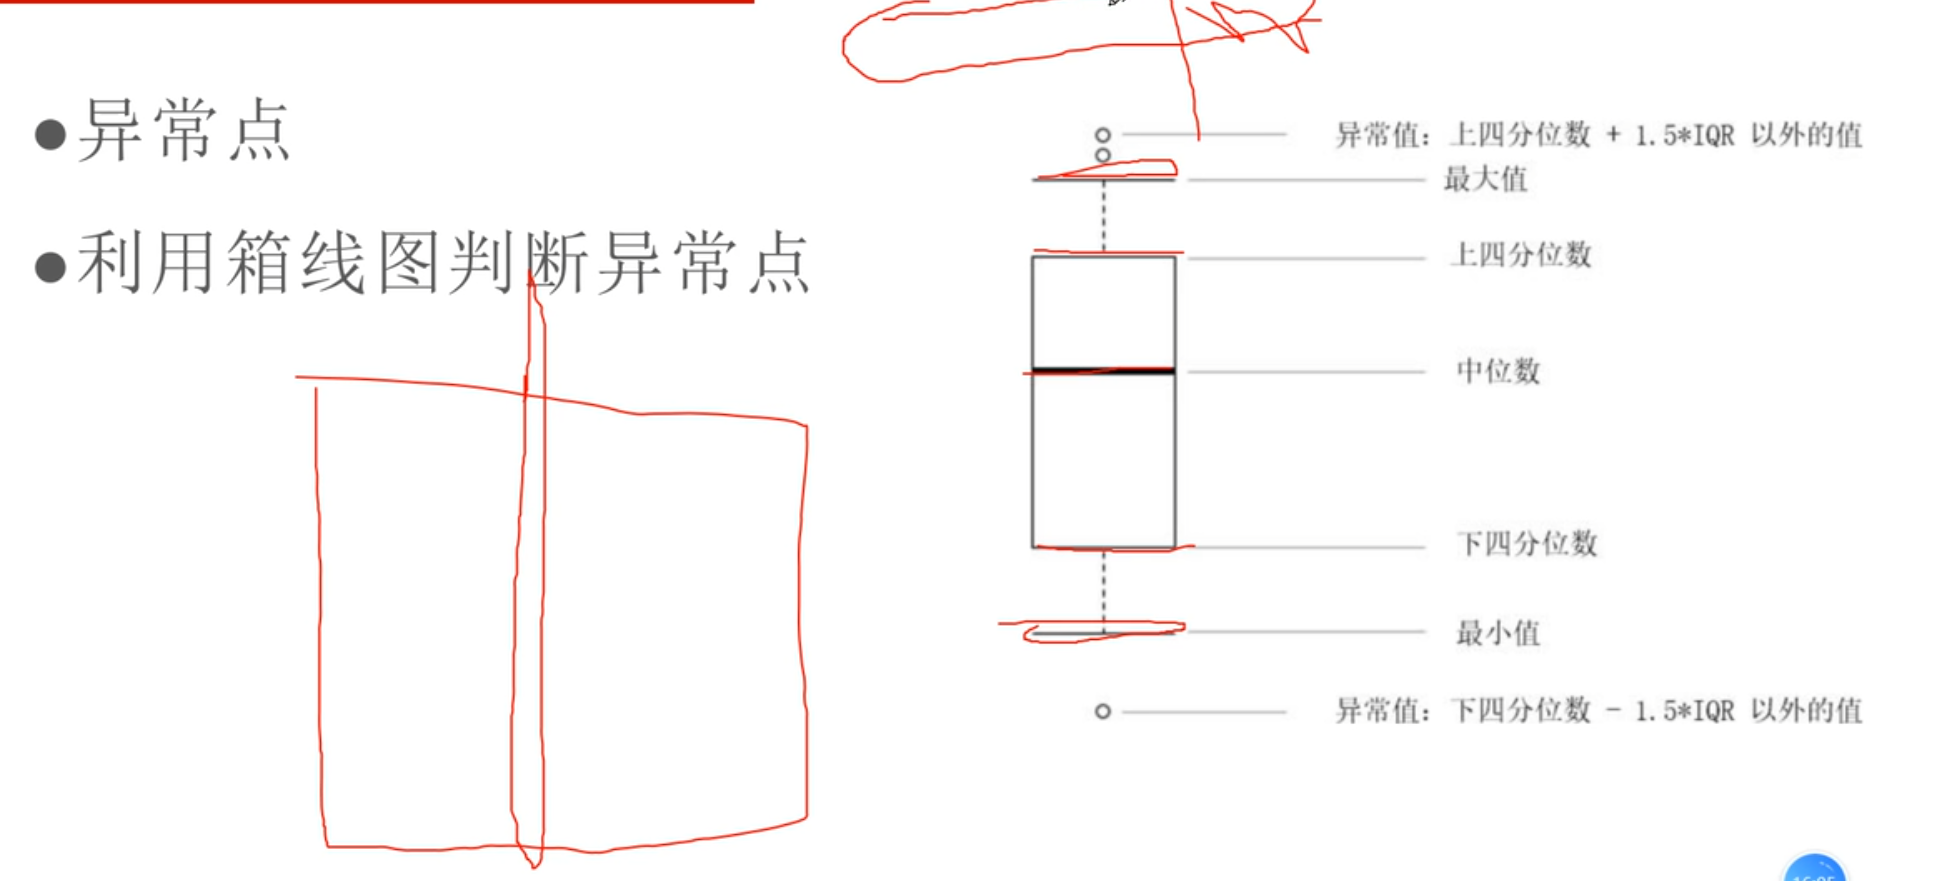

In [1]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-29 151845.png")

数据的规约：

数据规约的目的
对特征的规约:抛弃几余特征
。对数值的规约:数据的分布有偏;数据的范围波动大·形成对数据的更高效表示，能够学习到更好的模型·保留原始数据之间的关系，但是对异常值、极端值比较敏感

规约的方法：min—max规约：值减去最小值除以极差，把数据规约的（0，1）
Z-score规约：值减去mean（），除以std（）

插值法：

1.常数插值0，-1，均值，中位值

2.时序性的向前和向后插值

3。线性插值：比如缺少10，11日的数据，用直线将9号和12号的数值链接，10，11号的数据落在其上，用两点式

4.拉格朗日插值：

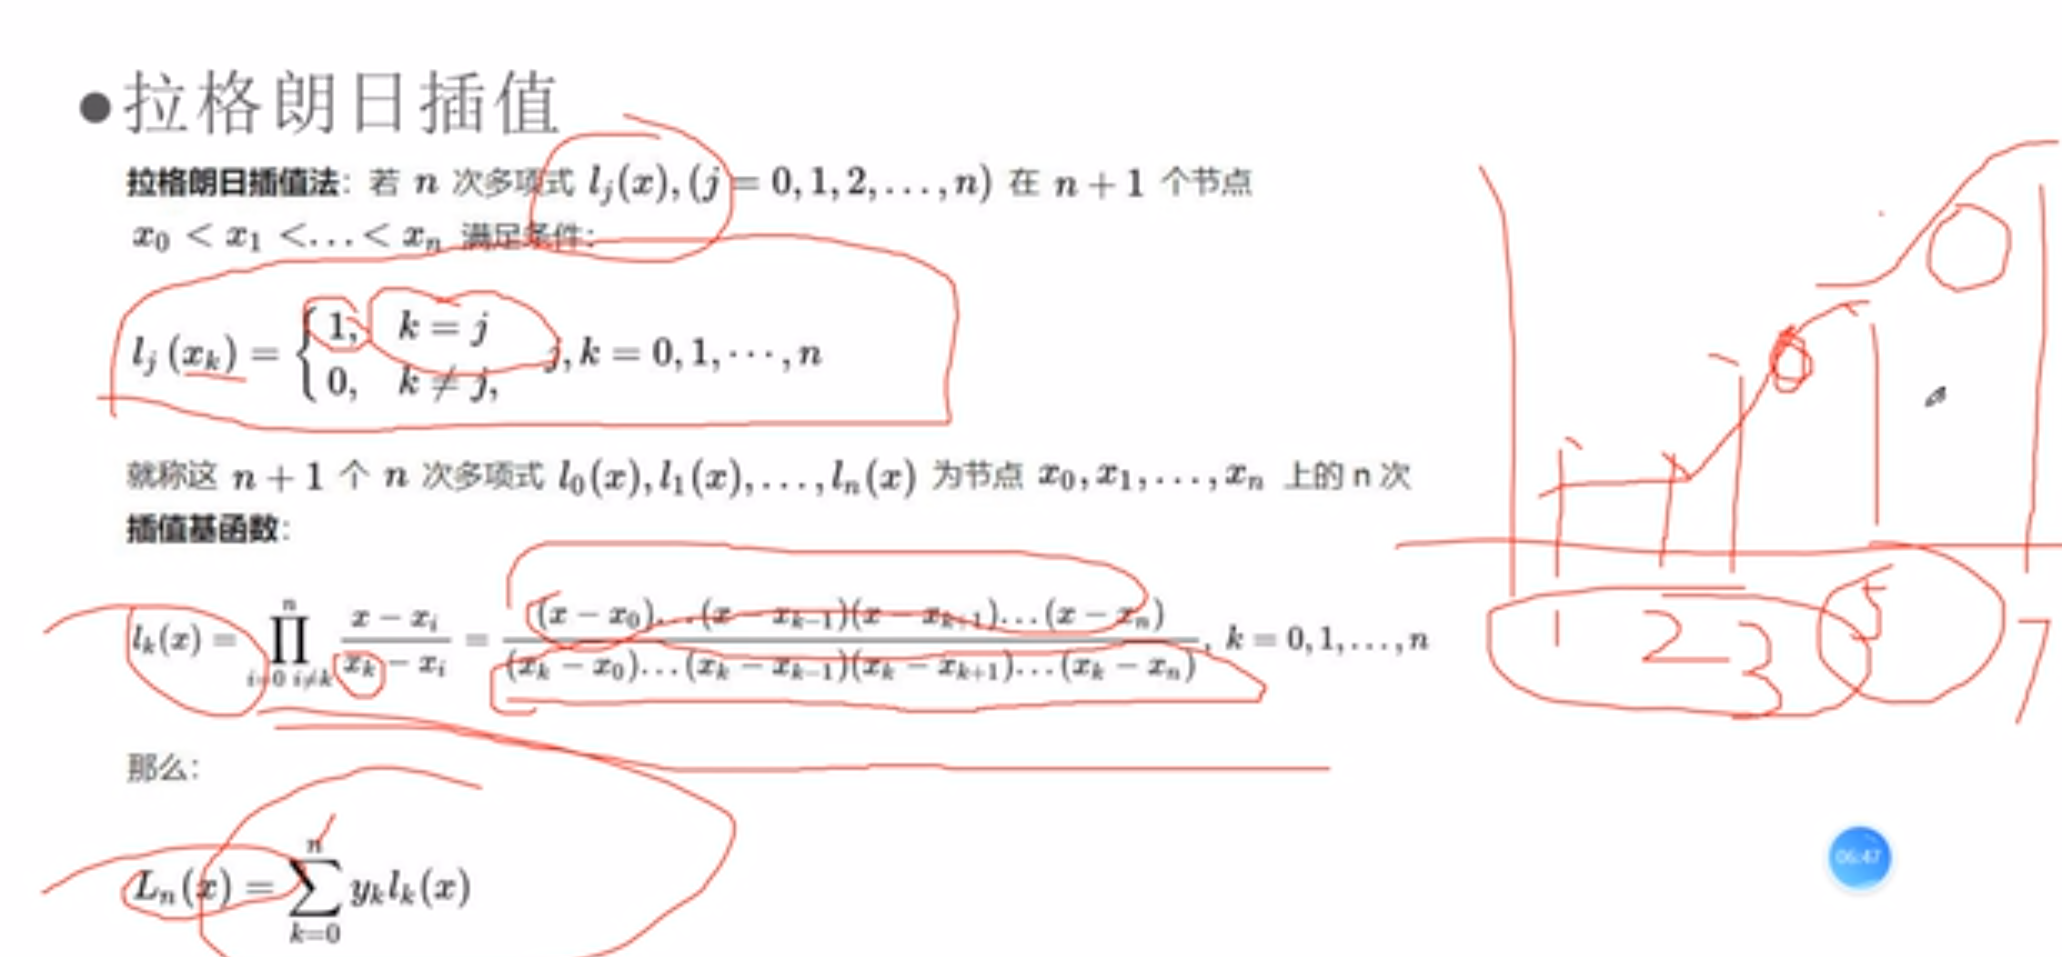

In [3]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-29 153346.png")

5.三次样条插值：效果最好

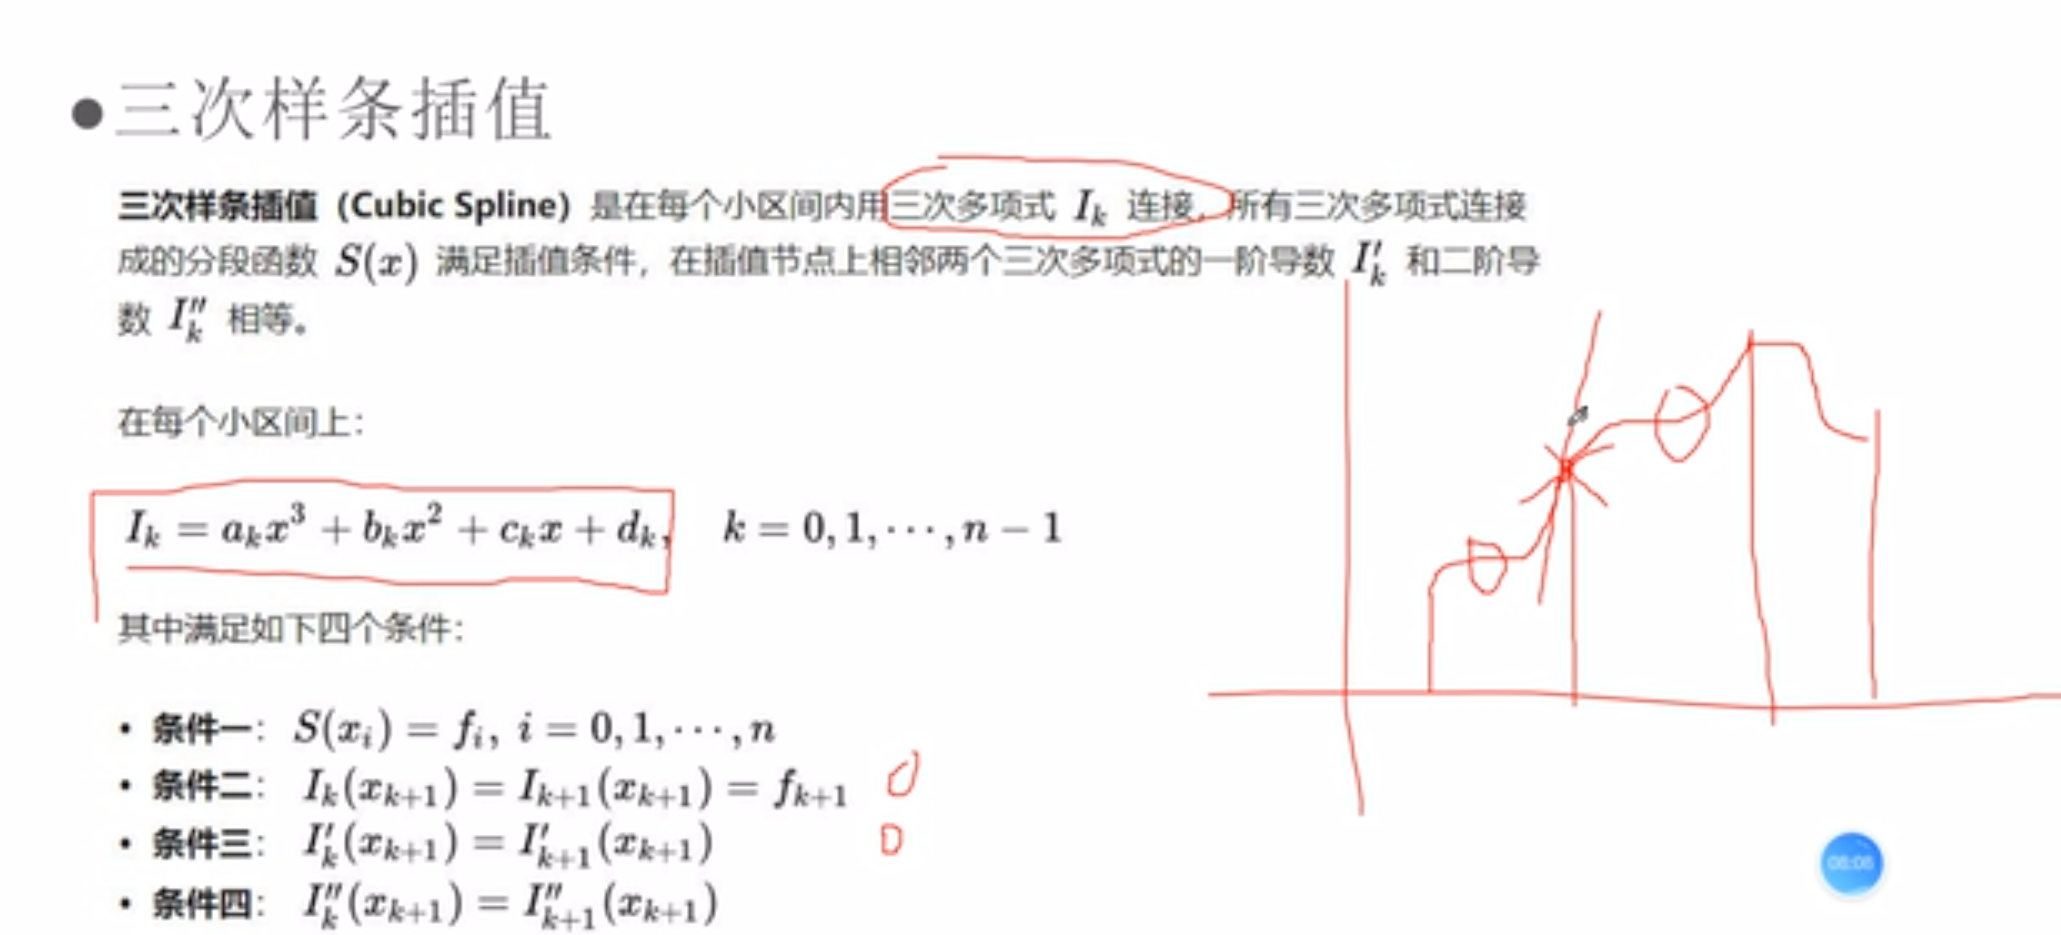

In [4]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-29 153511.png")

该导数可解

一元回归方程，多元回归方程  ：建模是关于最小二乘法是怎么得到和应用的

In [9]:
import numpy as np
x = np.arange(-1.5,1.6,0.5)
y = [-4.45,-0.45,0.55,0.05,0.12,0.13,4.55]
an = np.polyfit(x,y,3) #最后一位表示元的数目，3就为三元
print(an) #打印系数
p1 = np.poly1d(an)
print(p1) #打印方程

[ 1.96666667 -0.08142857 -1.46095238  0.15285714]
       3           2
1.967 x - 0.08143 x - 1.461 x + 0.1529


statsmodel也提供了OLS的方法， 可以更准确的线性回归

In [12]:
import numpy as np
import random
import statsmodels.api as sm
x1 = np.random.normal(0,1,100) #随机生成在0-1之间的100个数值
x2 = np.random.normal(0,1.5,100)
x3 = np.random.normal(0,2,100)
eps = np.random.normal(0,0.3,100) #生成噪声
C =np.array([1,0.5,2]) #设置每个元的系数
x = np.c_[x1,x2,x3] #np.c_ 提供了更简洁的语法，可以将切片对象转换为列向量并按列堆叠
y = x.dot(C)+eps #点乘加噪声
X_model = sm.add_constant(x) #给矩阵增加一列1，便于估计多元线性回归的截距，也便于后面进行参数估计时候的计算
model = sm.OLS(y,X_model) #使用普通最小二乘法
results = model.fit()#进行参数的估计，求出拟合
results.summary() #显示拟合结果
print(results.summary()) #coef 为其系数 std err 为误差估计，p为出错概率

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     5823.
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          2.00e-108
Time:                        16:14:11   Log-Likelihood:                -22.818
No. Observations:                 100   AIC:                             53.64
Df Residuals:                      96   BIC:                             64.06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0369      0.032     -1.161      0.2